In [ ]:
" path planning algorithm for point obstacles RRT(simple)"

NaN value @ [18.155538  32.4205374] node @ 3 iteration
NaN value @ [22.98306211 33.72246325] node @ 5 iteration
NaN value @ [22.98306211 33.72246325] node @ 6 iteration
NaN value @ [22.98306211 33.72246325] node @ 7 iteration
NaN value @ [22.98306211 33.72246325] node @ 8 iteration
NaN value @ [22.98306211 33.72246325] node @ 9 iteration
NaN value @ [22.98306211 33.72246325] node @ 10 iteration
NaN value @ [22.98306211 33.72246325] node @ 11 iteration
NaN value @ [22.98306211 33.72246325] node @ 12 iteration
NaN value @ [22.98306211 33.72246325] node @ 13 iteration
NaN value @ [22.98306211 33.72246325] node @ 14 iteration
NaN value @ [22.98306211 33.72246325] node @ 15 iteration
NaN value @ [22.98306211 33.72246325] node @ 16 iteration
NaN value @ [22.98306211 33.72246325] node @ 17 iteration
NaN value @ [22.98306211 33.72246325] node @ 18 iteration
NaN value @ [22.98306211 33.72246325] node @ 19 iteration
NaN value @ [22.98306211 33.72246325] node @ 20 iteration
NaN value @ [22.983062

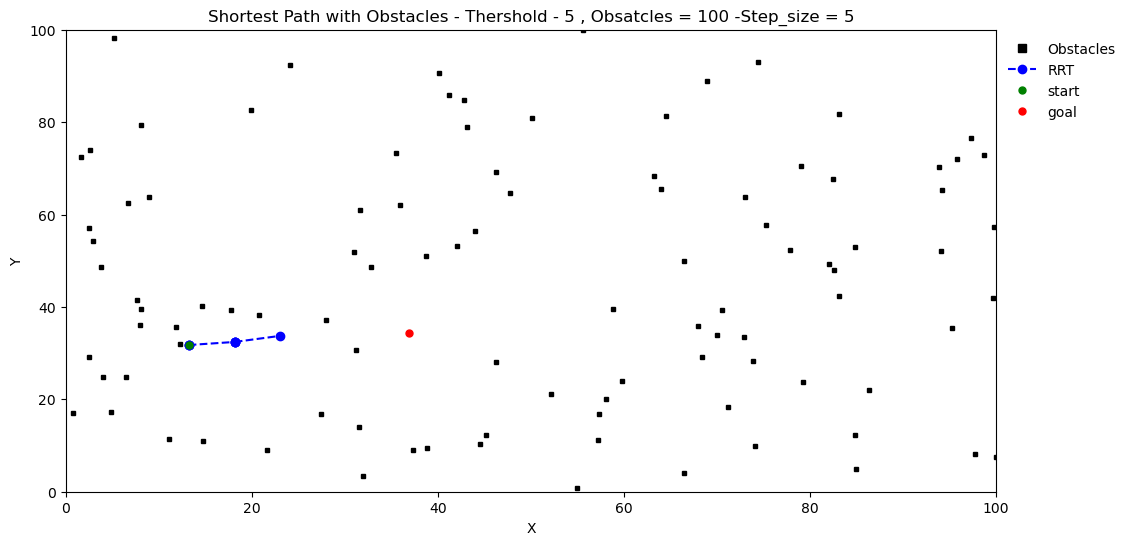

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# import random

# Define the environment (grid-based with obstacles)

# Example usage
OBSTACLE_THRESHOLD = 5
GRID_SIZE = 100
NUM_OBSTACLES = 100
step_size_t = 5
Max_iter = 20000
# Generate random obstacles
obstacles = np.random.rand(NUM_OBSTACLES, 2) * GRID_SIZE
# start = np.array([10, 10])
# goal = np.array([90, 90])
# Define the range for random start and goal points
START_RANGE = (0, GRID_SIZE)
GOAL_RANGE = (0, GRID_SIZE)
# Generate random start and goal points within the specified range
start = np.random.uniform(START_RANGE[0], START_RANGE[1], size=2)
goal = np.random.uniform(GOAL_RANGE[0], GOAL_RANGE[1], size=2)

# start = np.array([80, 50])
# goal = np.array([80, 10])
# obstacles[3] = np.array([80,30])


# Function to check if a point is in collision with any obstacle
def is_collision(point):
    for obstacle in obstacles:
        if np.linalg.norm(point - obstacle) < OBSTACLE_THRESHOLD:
            return True
    return False
# def generate_random_point(latest_node, goal, obstacles, max_offset=2):
def generate_random_point(latest_node, goal, max_offset=step_size_t):
    offset = np.random.rand(2) * max_offset
    direction = goal - latest_node
    direction = direction / np.linalg.norm(direction) #if np.linalg.norm(direction) != 0 else 1 # Normalize the direction vector
    return latest_node + offset * direction
    # if not check_collinear(latest_node, obstacles, goal):
    #     direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
    #     return latest_node + offset * direction
    # else: #check_collinear(latest_node, obstacles, goal):
    #     comp_direction = direction[0] + direction[1] * 1j  # convert to complex
    #     rotated_direction = comp_direction * np.exp(1j * np.pi/2)  # rotate by 45 degrees
    #     direction = np.array([rotated_direction.real,rotated_direction.imag])
    #     return latest_node + offset * direction


# Function to find the nearest node in the tree to a given point
def find_nearest_node(tree, point):
    distances = [np.linalg.norm(node - point) for node in tree]
    return tree[np.argmin(distances)]


# Function to extend the tree towards a new point
def extend_tree(tree, nearest_node, new_point, step_size=step_size_t):
    direction = new_point - nearest_node
    distance = np.linalg.norm(direction)
    new_node = nearest_node + step_size * (direction / distance)
    
    if not is_collision(new_node):
        # Check if the new node is close enough to the goal
        if np.linalg.norm(new_node - goal) <= step_size:
            new_node = goal
            return new_node
        # Check if the new node is too close to any existing node in the tree
        elif any(np.linalg.norm(new_node - node) < step_size for node in tree):
            return nearest_node  # Skip adding a redundant node
        return new_node  # Return the valid new node
    else:
        # Collision detected, return NaN values to indicate failure
        return np.array([np.nan, np.nan])



# Function to find the shortest path in the existing tree


# RRT function
def rrt(start, goal, max_iterations=Max_iter, step_size=step_size_t):
    tree = [start]
    for _ in range(max_iterations):
        latest_node = tree[-1]  # Get the latest node in the tree
        # random_point = generate_random_point(latest_node,goal, obstacles)  # Generate random point near latest node
        # random_point = generate_random_point()
        random_point = generate_random_point(latest_node, goal)
        nearest_node = find_nearest_node(tree, random_point)
        new_node = extend_tree(tree, nearest_node, random_point, step_size)
        # if np.any(np.isnan(new_node)):
        if  (np.isnan(new_node[0]) and np.isnan(new_node[1])):
            print(f"NaN value @ {tree[-1]} node @ {_} iteration")
            continue
        elif np.allclose(new_node, goal):
            tree.append(new_node)
            return tree
        tree.append(new_node)
    print(_)
    return tree


# Function to plot the environment and the path
def plot_rrt(tree, start, goal):
    plt.figure(figsize=(8, 6))
    plt.plot(start[0], start[1], 'go', markersize=5)
    plt.plot(goal[0], goal[1], 'ro', markersize=5)
    for obstacle in obstacles:
        plt.plot(obstacle[0], obstacle[1], 'ks',markersize=5)
    for i in range(len(tree) - 1):
        plt.plot([tree[i][0], tree[i + 1][0]], [tree[i][1], tree[i + 1][1]], 'b',linestyle='dashed')
    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('RRT Path Planning')
    plt.tight_layout()
    # plt.grid(True)
    plt.show()


def find_shortest_path(tree, start, goal,step_size=step_size_t):
    # Find the nearest node in the tree to the goal
    nearest_to_goal = find_nearest_node(tree, goal)

    # Initialize the path with the goal node
    path = [nearest_to_goal]

    # Backtrack from the goal node to the start node
    current_node = nearest_to_goal
    # print(type(current_node))
    trim_tree = tree
    # while not np.allclose(current_node, start, atol=4):
    while not np.linalg.norm(start - current_node) < step_size:
        # Find the parent node of the current node
        parent_node = None
        for node in trim_tree:
            # if np.allclose(node, current_node, atol=4):
            if np.linalg.norm(node - current_node) < step_size:
                parent_node = node
                break
            # else:
        if parent_node is None:
            parent_node = trim_tree[-1]

        # Add the parent node to the path
        path.append(parent_node)
        # Update the current node to its parent for the next iteration
        current_node = parent_node
        # trim_tree = trim_tree[:-1]
    # Add the start node to the path
    path.append(start)

    # Reverse the path to get the correct order from start to goal
    path.reverse()

    return path


# find the shortest path

# def find_short_path(tree, start, goal, obstacles):
#     new_tree = []
#     for i in range(len(tree) - 1):
#         # print(f"i: {i}, len(tree): {len(tree)}")
#
#         point_1 = tree[i]
#         # new_tree.append(point_1)
#         tree_copy = tree[:]
#         for j in range(len(tree_copy) - 1, i, -1):
#             point_2 = tree_copy[j]
#             # coeff = np.polyfit([point_1[0],point_2[0]], [point_1[1], point_2[1]],1)
#             delta_x = point_2[0] - point_1[0]
#             delta_y = point_2[1] - point_1[1]
#
#             if delta_x == 0:
#                 # slope = float('inf')  # Vertical line, infinite slope
#                 # intercept = 0
#                 for obstacle in obstacles:
#                     d = abs(obstacle[0] - point_1[0])
#
#             else:
#                 slope = delta_y / delta_x
#                 intercept = point_1[1] - slope * point_1[0]
#                 for obstacle in obstacles:
#                   d = abs((obstacle[1] - slope * obstacle[0] - intercept)) / np.sqrt(1 ** 2 + slope ** 2)
#
#             # coeff = (slope, intercept)
#
#             # slope = coeff[0] # slope
#             # inter = coeff[1] # intercept
#             # if all((abs((obstacle[1] - coeff[0] * obstacle[0] - coeff[1])) / np.sqrt(1 ** 2 + coeff[0] ** 2))
#             #        >= OBSTACLE_THRESHOLD for obstacle in obstacles):
#             if d >= OBSTACLE_THRESHOLD:
#                 # new_tree.extend([point_1,point_2])
#                 new_tree.append(point_2)
#                 # print(new_tree)
#                 # tree = new_tree # update the tree
#                 break
#         if np.all(np.isclose(new_tree[-1], goal, atol=0)):  # Goal reached
#             print("goal reached")
#             break
#         # print(new_tree)
#     return new_tree


def find_short_path(tree, start, goal, obstacles):
    new_tree = []
    h = 0
    while h != len(tree):
        # print(f"i: {i}, len(tree): {len(tree)}")

        point_1 = tree[h]
        # print(point_1)
        new_tree.append(point_1)
        # tree_copy = tree[:]
        # tree
        for j in reversed(tree[h:]):
            point_2 = j
            # coeff = np.polyfit([point_1[0],point_2[0]], [point_1[1], point_2[1]],1)
            delta_x = point_2[0] - point_1[0]
            delta_y = point_2[1] - point_1[1]

            if delta_x == 0:
                # slope = float('inf')  # Vertical line, infinite slope
                # intercept = 0
                for obstacle in obstacles:
                    d = abs(obstacle[0] - point_1[0])

            else:
                slope = delta_y / delta_x
                intercept = point_1[1] - slope * point_1[0]
                for obstacle in obstacles:
                  d = abs((obstacle[1] - slope * obstacle[0] - intercept)) / np.sqrt(1 ** 2 + slope ** 2)

            # coeff = (slope, intercept)

            # slope = coeff[0] # slope
            # inter = coeff[1] # intercept
            # if all((abs((obstacle[1] - coeff[0] * obstacle[0] - coeff[1])) / np.sqrt(1 ** 2 + coeff[0] ** 2))
            #        >= OBSTACLE_THRESHOLD for obstacle in obstacles):
            if d >= OBSTACLE_THRESHOLD:
                # new_tree.extend([point_1,point_2])
                new_tree.append(point_2)
                h = j
                # print(new_tree)
                # tree = new_tree # update the tree
                break
            h += 1
            print (h)
        if np.all(np.isclose(new_tree[-1], goal, atol=0)):  # Goal reached
            print("goal reached")
            break
        # print(new_tree)
    return new_tree

# def find_short_path(tree, start, goal, obstacles):
#     new_tree = [start]
#     tree_j = tree
#     len1 =0
#     len2 =0
#     # for i=0 in range(len(tree)):
#     while not np.all(np.isclose(new_tree[-1], goal, atol=0)):
#         if len1 == len2:
#           i = 0
#         else:
#           i = i + 1
#         point_1 = tree_j[i]
#         # new_tree.append(point_1)
#         # tree_copy = tree[:]
#         for j in range(len(tree_j) - 1,i, -1):
#             print(f"i: {i}, len(tree): {len(tree)}, j: {j}")
#             point_2 = tree_j[j]
#             # coeff = np.polyfit([point_1[0],point_2[0]], [point_1[1], point_2[1]],1)
#             delta_x = point_2[0] - point_1[0]
#             delta_y = point_2[1] - point_1[1]
#
#             if delta_x == 0:
#                 # slope = float('inf')  # Vertical line, infinite slope
#                 intercept = 0
#                 for obstacle in obstacles:
#                     d = abs(obstacle[0] - point_1[0])
#
#             else:
#                 slope = delta_y / delta_x
#                 intercept = point_1[1] - slope * point_1[0]
#                 for obstacle in obstacles:
#                   d = abs((obstacle[1] - slope * obstacle[0] - intercept)) / np.sqrt(1 ** 2 + slope ** 2)
#
#             # coeff = (slope, intercept)
#
#             # slope = coeff[0] # slope
#             # inter = coeff[1] # intercept
#             # if all((abs((obstacle[1] - coeff[0] * obstacle[0] - coeff[1])) / np.sqrt(1 ** 2 + coeff[0] ** 2))
#             #        >= OBSTACLE_THRESHOLD for obstacle in obstacles):
#             if d >= OBSTACLE_THRESHOLD:
#                 # new_tree.extend([point_1,point_2])
#                 len1 = len(new_tree)
#                 new_tree.append(point_2)
#                 len2 = len(new_tree)
#                 # print(new_tree)
#                 # tree = new_tre # update the tree
#                 tree_j = tree[j:]
#                 tree = new_tree + tree[j:]
#                 break
#         if np.all(np.isclose(new_tree[-1], goal, atol=0)):  # Goal reached
#             print("goal reached")
#             break
#         # print(new_tree)
#     return new_tree
# Function to plot the shortest path
def plot_shortest_path(tree, start, goal):
    # shortest_path = find_shortest_path(tree, start, goal)
    # shortest_path = find_short_path(tree, start, goal, obstacles)
    # print(shortest_path)
    plt.figure(figsize=(12, 6))
    # Plot obstacles
    for obstacle in obstacles:
        plt.plot(obstacle[0], obstacle[1], 'ks', markersize=OBSTACLE_THRESHOLD - 2)
    plt.plot([],[] , 'ks', label='Obstacles')
    # Plot RRT tree
    for i in range(len(tree) - 1):
        plt.plot([tree[i][0], tree[i+1][0]], [tree[i][1], tree[i+1][1]], color='b',linestyle='dashed',marker ='o')
    # Plot shortest path
    plt.plot([],[],color='b',linestyle='dashed',label='RRT',marker='o')
    # for i in range(len(shortest_path) - 1):
    #     plt.plot([shortest_path[i][0], shortest_path[i+1][0]], [shortest_path[i][1], shortest_path[i+1][1]], 'r-', linewidth=2)
    # plt.plot([], [], 'r-',linewidth=2, label='opt_path')
    plt.plot(start[0], start[1], 'go', markersize=5,label='start') # start green start
    plt.plot(goal[0], goal[1], 'ro', markersize=5,label='goal')
    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Shortest Path with Obstacles - Thershold - {OBSTACLE_THRESHOLD} , Obsatcles = {len(obstacles)} -Step_size = {step_size_t}')
    # plt.tight_layout()
    plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
    plt.show()
    
path = rrt(start, goal)
# plot_rrt(path, start, goal)
plot_shortest_path(path, start, goal)


In [ ]:
print(f"new_node: {node}, type: {type(node)}")


In [ ]:
start.shape

In [ ]:
path